In [75]:
import pandas as pd
import numpy as np
np.random.seed(16)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [76]:
def preprocess(df):
    print('----------------------------------------------')
    print("Before preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # Replace 0 values with the mean of the existing values
    df['Glucose'] = df['Glucose'].replace(0, np.nan)
    df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
    df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
    df['Insulin'] = df['Insulin'].replace(0, np.nan)
    df['BMI'] = df['BMI'].replace(0, np.nan)
    df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
    df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
    df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
    df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
    df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

    print('----------------------------------------------')
    print("After preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # Standardization
    df_scaled = preprocessing.scale(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    df_scaled['Outcome'] = df['Outcome']
    df = df_scaled


    return df

In [77]:
# look at the first 5 rows of the dataset
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [78]:
# Perform preprocessing and feature engineering
df = preprocess(df)

----------------------------------------------
Before preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------
----------------------------------------------
After preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------


In [79]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1


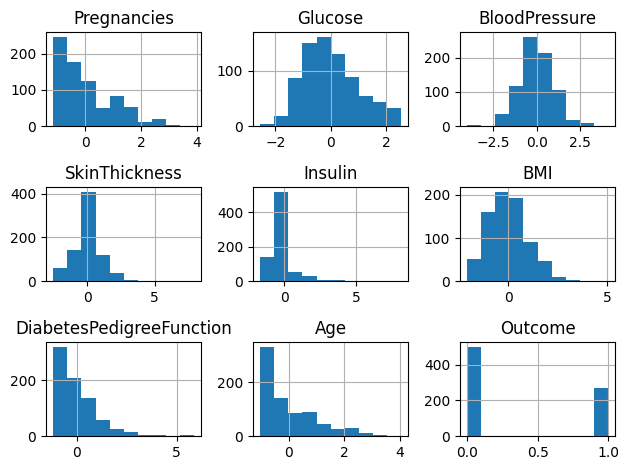

In [80]:
# show histogram
df.hist()
plt.tight_layout()
plt.show()

In [81]:
# Split the data into a training and testing set
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [82]:
# Build neural network in Keras
# model_1
model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_dim=8))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.fit(X_train, y_train, epochs=100, verbose=False)

# Results - Accuracy
train_score_1 = model_1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (train_score_1[1]*100))
test_score_1 = model_1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (test_score_1[1]*100))

Training Accuracy: 81.92%

Testing Accuracy: 85.71%



In [83]:
# Build neural network in Keras
# model_2
model_2 = Sequential()
model_2.add(Dense(32, activation='relu', input_dim=8))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=100, verbose=False)

# Results - Accuracy
train_score_2 = model_2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (train_score_2[1]*100))
test_score_2 = model_2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (test_score_2[1]*100))

Training Accuracy: 85.83%

Testing Accuracy: 88.96%



In [84]:
# Build neural network in Keras
# model 3
model_3 = Sequential()
model_3.add(Dense(16, activation='relu', input_dim=8))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(64, activation='sigmoid'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3.fit(X_train, y_train, epochs=100, verbose=False)

# Results - Accuracy
train_score_3 = model_3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (train_score_3[1]*100))
test_score_3 = model_3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (test_score_3[1]*100))

Training Accuracy: 84.36%

Testing Accuracy: 88.31%



5/5 [==============================] - 0s 778us/step


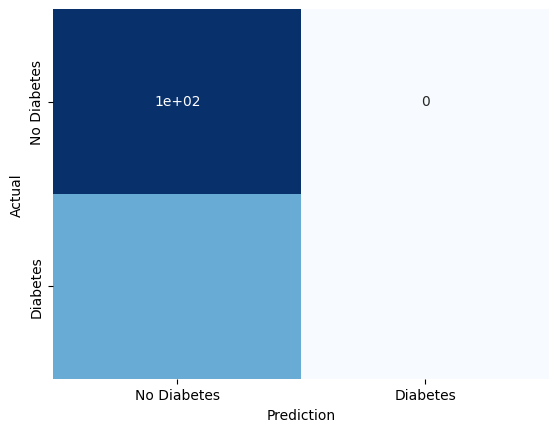

<Figure size 640x480 with 0 Axes>

In [85]:
# Results - Confusion Matrix
y_test_pred = np.argmax(model.predict(X_test), axis=-1)
#y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)

ax = sns.heatmap(
    c_matrix, annot=True,
    xticklabels=['No Diabetes', 'Diabetes'],
    yticklabels=['No Diabetes', 'Diabetes'],
    cbar=False, cmap='Blues'
)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

5/5 [==============================] - 0s 939us/step


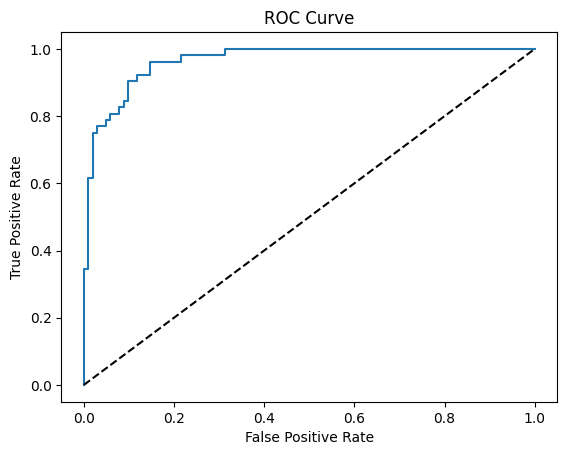

<Figure size 640x480 with 0 Axes>

In [86]:
# Results - ROC Curve
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)


plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()